In [41]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv(r"C:\Users\fatih\Downloads\zoo.csv")
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [6]:
df.shape

(101, 18)

In [7]:
df.isnull().sum().sum()

0

In [8]:
df_class = pd.read_csv(r"C:\Users\fatih\Downloads\class.csv")
df_class

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [9]:
animal_names = df["animal_name"]
df = df.drop(columns=["animal_name"])

df.head()


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


<Axes: >

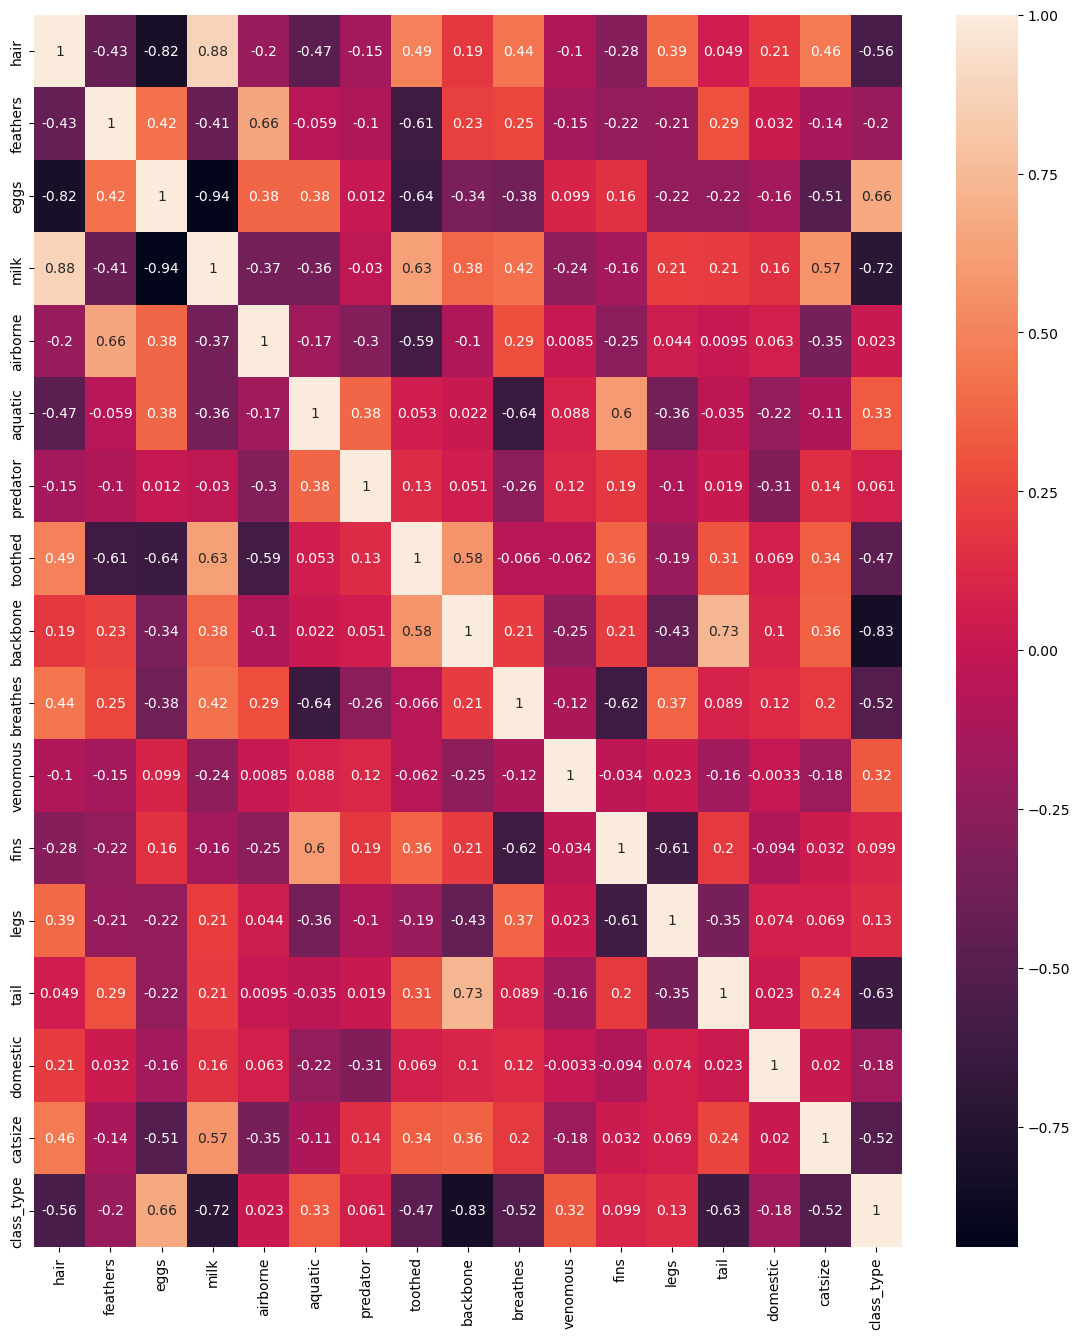

In [15]:
corr = df.corr()
plt.figure(figsize=(14,16))
sns.heatmap(corr, annot=True)


### I don't need the scale my data because it's binary.



#### HIREARCHIAL CLUSTERING



In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist, squareform

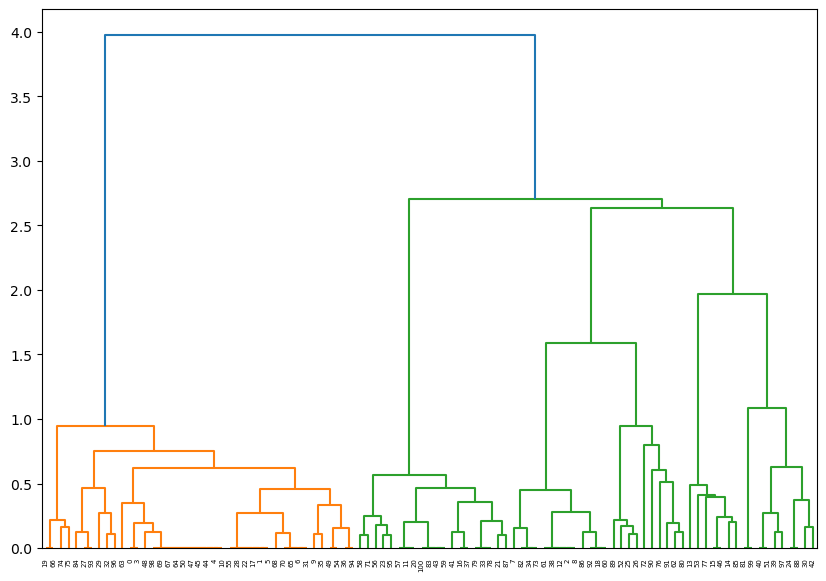

In [ ]:
distance_matrix = pdist(df, metric='jaSccard')

# Hierarchical clustering
Z = linkage(distance_matrix, method='ward')

# Dendrogram çizimi
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.show()

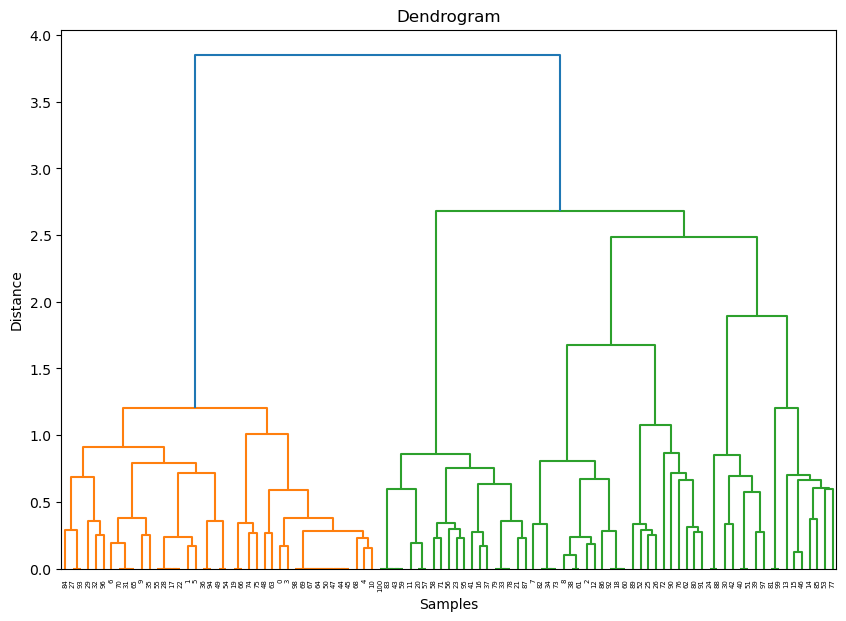

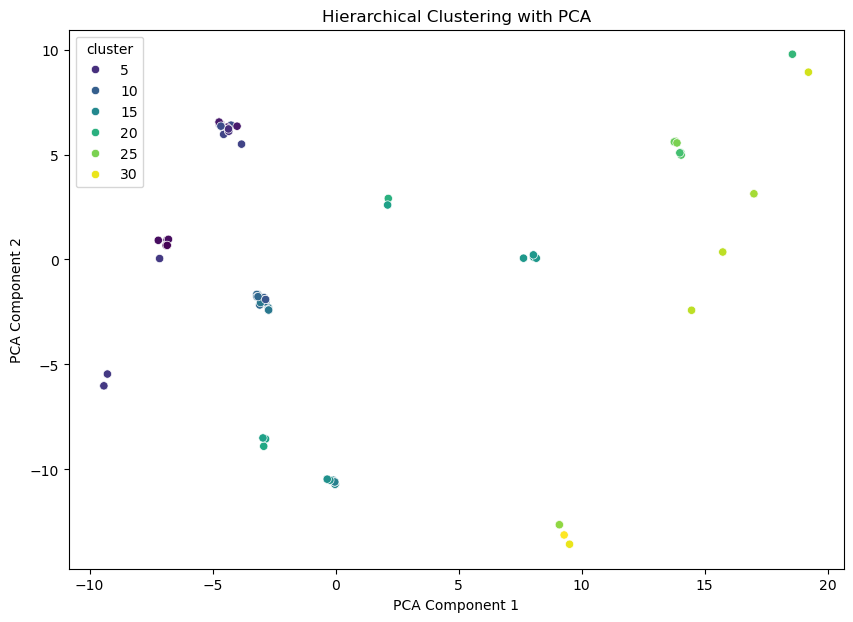

cluster
8     13
3      6
4      6
15     5
11     5
13     5
16     4
9      4
5      4
6      4
17     4
14     4
12     3
18     3
1      3
2      3
10     3
27     2
26     2
7      2
24     2
25     2
23     2
22     2
28     2
31     1
29     1
21     1
19     1
30     1
20     1
Name: count, dtype: int64
   hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  backbone  \
0     1         0     0     1         0        0         1        1         1   
1     1         0     0     1         0        0         0        1         1   
2     0         0     1     0         0        1         1        1         1   
3     1         0     0     1         0        0         1        1         1   
4     1         0     0     1         0        0         1        1         1   

   breathes  venomous  fins  legs  tail  domestic  catsize  class_type  \
0         1         0     0     4     0         0        1           1   
1         1         0     0     4     1         0   

In [ ]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

distance_matrix = pdist(df, metric='jaccard')

Z = linkage(distance_matrix, method='ward')


plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


clusters = fcluster(Z, max_d, criterion='distance')


df['cluster'] = clusters


pca = PCA(n_components=2)
pca_components = pca.fit_transform(df.drop('cluster', axis=1))

df['pca1'] = pca_components[:, 0]
df['pca2'] = pca_components[:, 1]


plt.figure(figsize=(10, 7))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df, palette='viridis')
plt.title('Hierarchical Clustering with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

print(df['cluster'].value_counts())
print(df.head())

Cluster Means:
          hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
cluster                                                                     
1         0.5       0.0   0.0   1.0  0.000000      1.0  1.000000      1.0   
2         1.0       0.0   0.5   1.0  0.000000      1.0  1.000000      0.5   
3         1.0       0.0   0.0   1.0  0.000000      0.0  1.000000      1.0   
4         1.0       0.0   0.0   1.0  0.666667      0.0  0.000000      1.0   
5         1.0       0.0   0.0   1.0  0.000000      0.0  0.333333      1.0   
6         1.0       0.0   0.0   1.0  0.000000      0.0  0.000000      1.0   
7         1.0       0.0   0.0   1.0  0.000000      0.0  0.000000      1.0   
8         1.0       0.0   0.0   1.0  0.000000      0.0  0.500000      1.0   
9         0.0       1.0   1.0   0.0  1.000000      0.0  0.000000      0.0   
10        0.0       1.0   1.0   0.0  1.000000      0.0  0.000000      0.0   
11        0.0       1.0   1.0   0.0  1.000000      1.0  0.60

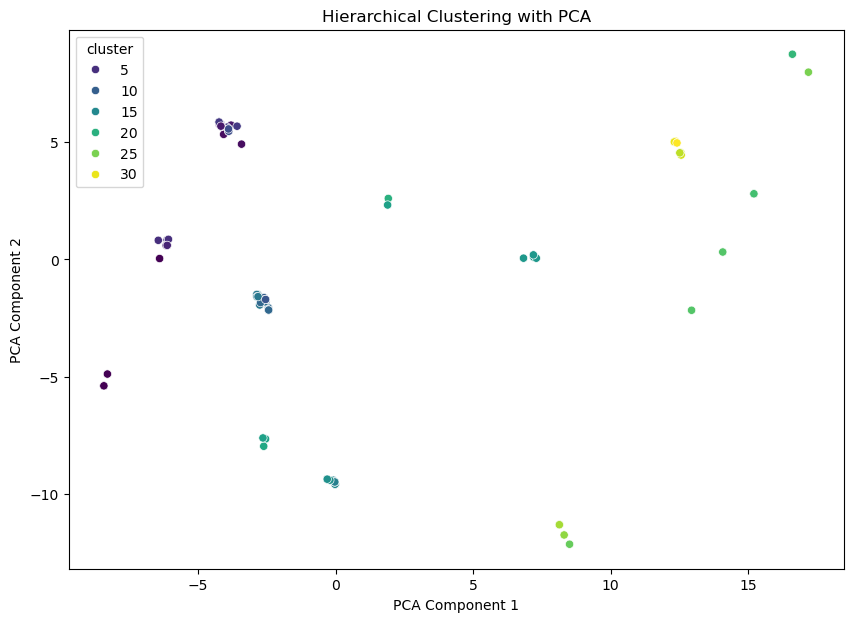

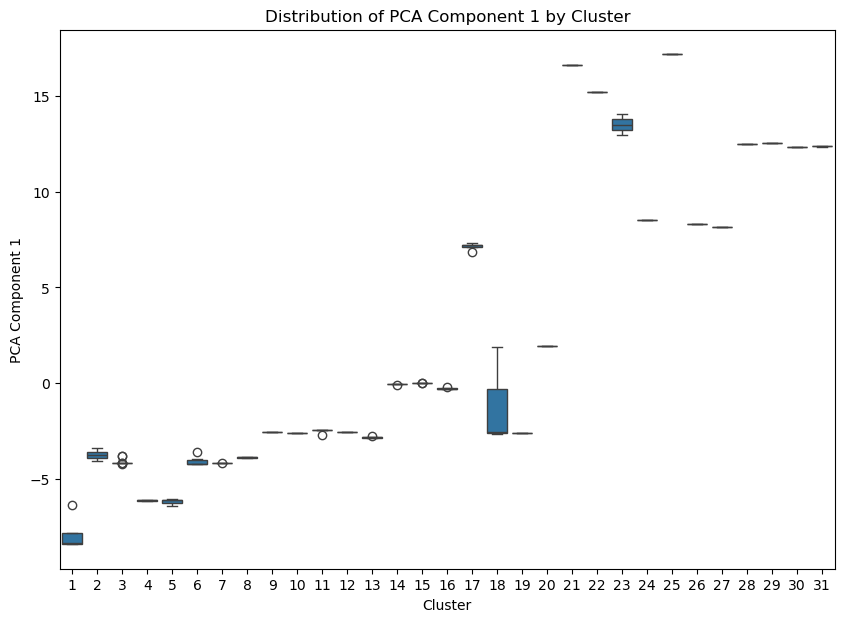

In [37]:
cluster_means = df.groupby('cluster').mean()
print("Cluster Means:\n", cluster_means)


cluster_sizes = df['cluster'].value_counts()
print("Cluster Sizes:\n", cluster_sizes)


plt.figure(figsize=(10, 7))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df, palette='viridis')
plt.title('Hierarchical Clustering with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


plt.figure(figsize=(10, 7))
sns.boxplot(x='cluster', y='pca1', data=df)
plt.title('Distribution of PCA Component 1 by Cluster')
plt.xlabel('Cluster')
plt.ylabel('PCA Component 1')
plt.show()

c:\Users\fatih\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\fatih\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\fatih\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\fatih\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

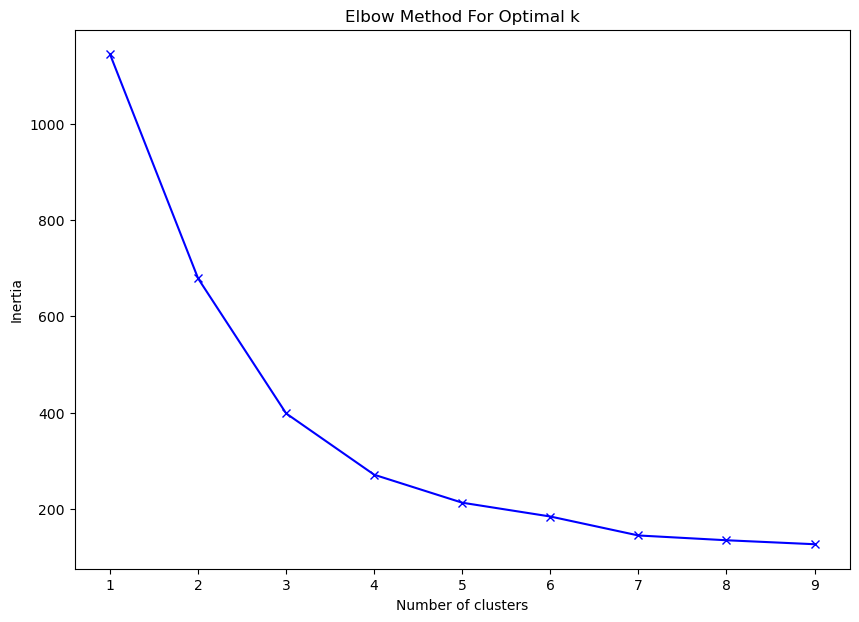

c:\Users\fatih\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\fatih\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\fatih\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\fatih\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

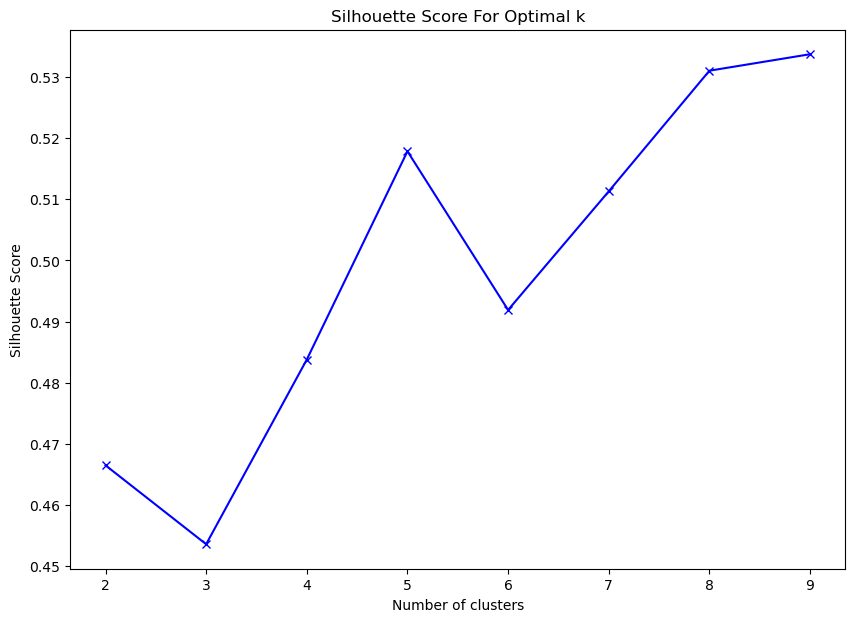

In [42]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow Method
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df.drop(['cluster', 'pca1', 'pca2'], axis=1))
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 7))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Silhouette Score
silhouette_scores = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df.drop(['cluster', 'pca1', 'pca2'], axis=1))
    score = silhouette_score(df.drop(['cluster', 'pca1', 'pca2'], axis=1), kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 7))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')
plt.show()

Text(0, 0.5, 'PCA Component 2')

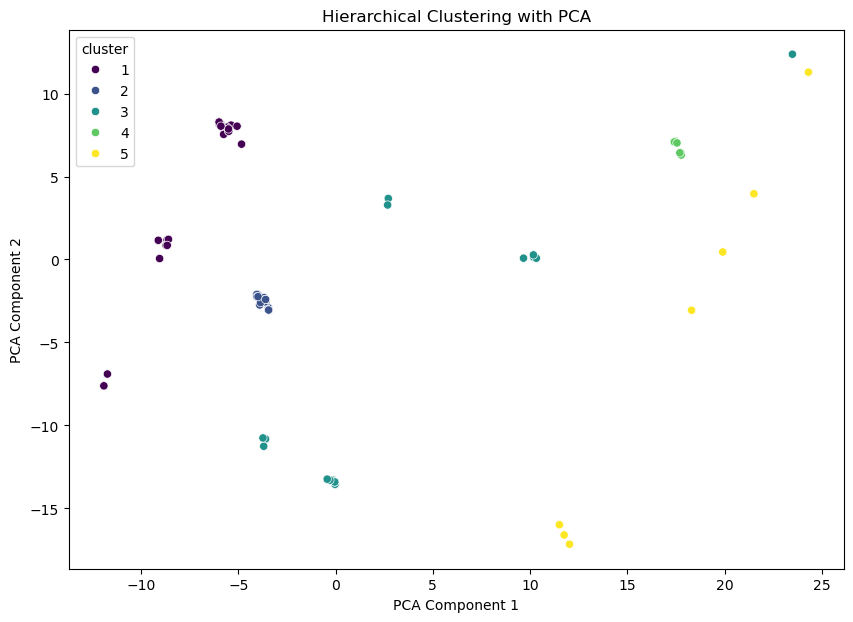

In [ ]:
optimal_k = 3  
clusters = fcluster(Z, optimal_k, criterion='maxclust')

df['cluster'] = clusters

pca = PCA(n_components=2)
pca_components = pca.fit_transform(df.drop('cluster', axis=1))

df['pca1'] = pca_components[:, 0]
df['pca2'] = pca_components[:, 1]

plt.figure(figsize=(10, 7))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df, palette='viridis')
plt.title('Hierarchical Clustering with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

#### K-Means Clustering

c:\Users\fatih\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\fatih\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\fatih\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\fatih\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

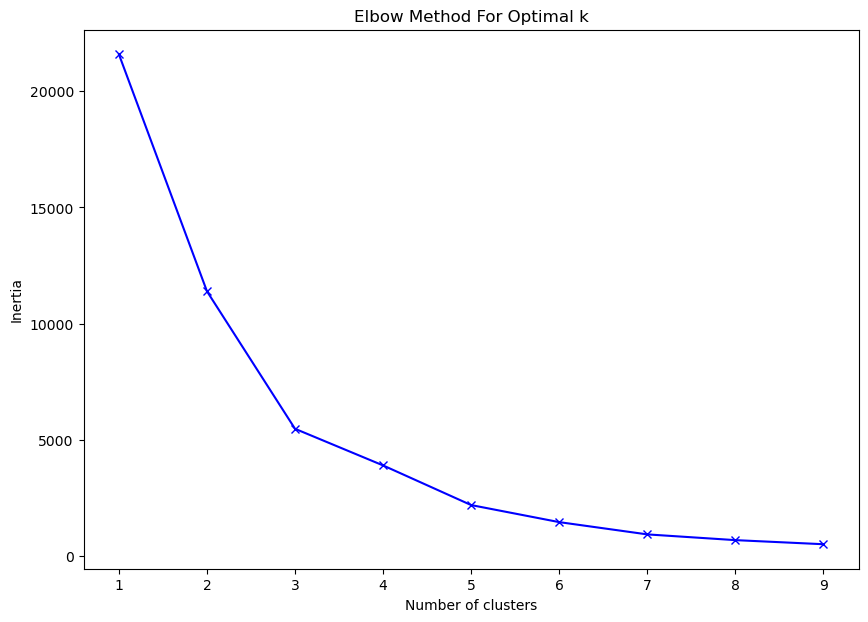

c:\Users\fatih\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\fatih\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\fatih\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\fatih\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

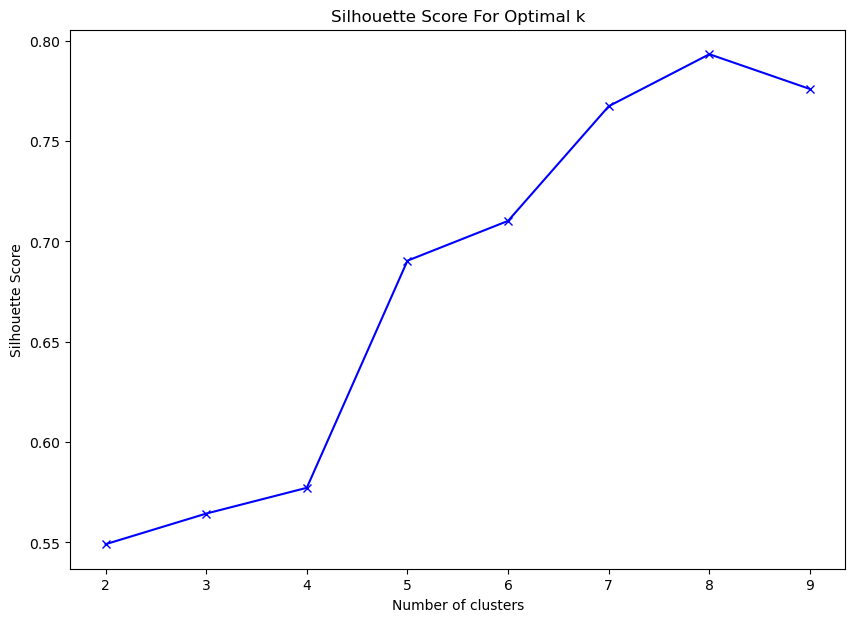

Optimal küme sayısı: 8


c:\Users\fatih\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


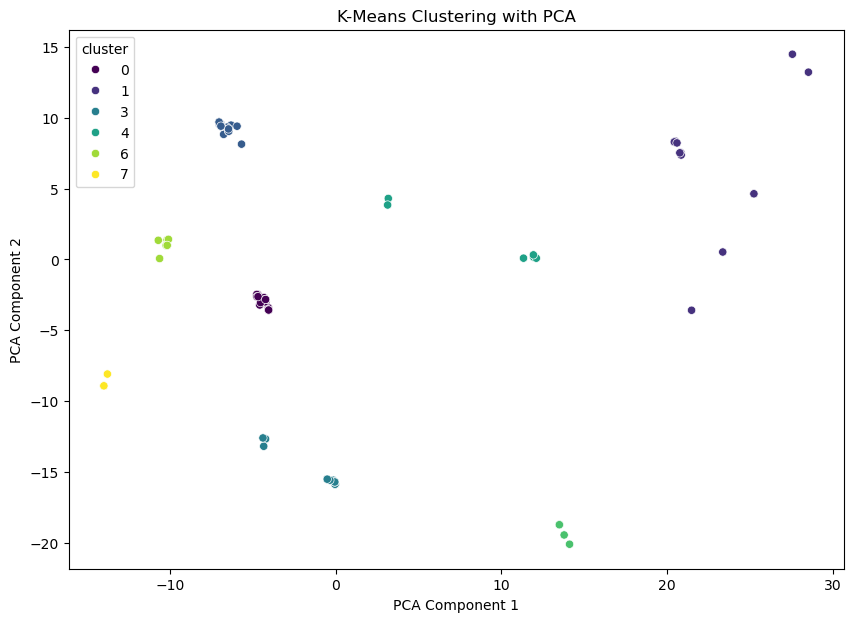

cluster
2    31
0    20
3    16
1    14
6     7
4     6
5     4
7     3
Name: count, dtype: int64
   hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  backbone  \
0     1         0     0     1         0        0         1        1         1   
1     1         0     0     1         0        0         0        1         1   
2     0         0     1     0         0        1         1        1         1   
3     1         0     0     1         0        0         1        1         1   
4     1         0     0     1         0        0         1        1         1   

   breathes  venomous  fins  legs  tail  domestic  catsize  class_type  \
0         1         0     0     4     0         0        1           1   
1         1         0     0     4     1         0        1           1   
2         0         0     1     0     1         0        0           4   
3         1         0     0     4     0         0        1           1   
4         1         0     0     4     1      

In [54]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 7))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


silhouette_scores = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 7))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')
plt.show()


optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Silhouette Score'dan optimal k'yı belirleme
print(f"Optimal küme sayısı: {optimal_k}")


kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(df)


pca = PCA(n_components=2)
pca_components = pca.fit_transform(df.drop('cluster', axis=1))


df['pca1'] = pca_components[:, 0]
df['pca2'] = pca_components[:, 1]



plt.figure(figsize=(10, 7))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df, palette='viridis')
plt.title('K-Means Clustering with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()



print(df['cluster'].value_counts())
print(df.head())

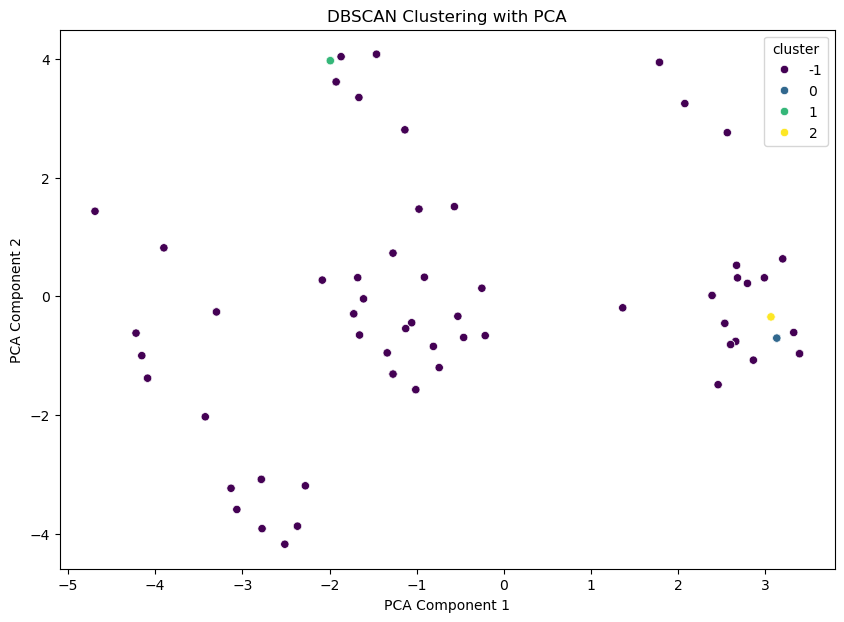

cluster
-1    80
 2    10
 0     6
 1     5
Name: count, dtype: int64
   hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  backbone  \
0     1         0     0     1         0        0         1        1         1   
1     1         0     0     1         0        0         0        1         1   
2     0         0     1     0         0        1         1        1         1   
3     1         0     0     1         0        0         1        1         1   
4     1         0     0     1         0        0         1        1         1   

   breathes  venomous  fins  legs  tail  domestic  catsize  class_type  \
0         1         0     0     4     0         0        1           1   
1         1         0     0     4     1         0        1           1   
2         0         0     1     0     1         0        0           4   
3         1         0     0     4     0         0        1           1   
4         1         0     0     4     1         0        1           1   

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


dbscan = DBSCAN(eps=0.5, min_samples=5)
df['cluster'] = dbscan.fit_predict(df_scaled)


pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)


df['pca1'] = pca_components[:, 0]
df['pca2'] = pca_components[:, 1]


plt.figure(figsize=(10, 7))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df, palette='viridis')
plt.title('DBSCAN Clustering with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


print(df['cluster'].value_counts())print(df.head())

In [57]:
cluster_means = df.groupby('cluster').mean()
print(cluster_means)

           hair  feathers   eggs    milk  airborne  aquatic  predator  \
cluster                                                                 
-1       0.3375      0.25  0.675  0.3125       0.3   0.3875    0.5125   
 0       1.0000      0.00  0.000  1.0000       0.0   0.0000    0.0000   
 1       0.0000      0.00  1.000  0.0000       0.0   1.0000    1.0000   
 2       1.0000      0.00  0.000  1.0000       0.0   0.0000    1.0000   

         toothed  backbone  breathes  venomous  fins    legs   tail  domestic  \
cluster                                                                         
-1           0.5     0.775       0.8       0.1  0.15  2.7875  0.675    0.1625   
 0           1.0     1.000       1.0       0.0  0.00  4.0000  1.000    0.0000   
 1           1.0     1.000       0.0       0.0  1.00  0.0000  1.000    0.0000   
 2           1.0     1.000       1.0       0.0  0.00  4.0000  1.000    0.0000   

         catsize  class_type      pca1      pca2  
cluster                